In [2]:
# подгружаемся
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
# грузим
data = pd.read_csv('soybean-large_data.csv')

In [4]:
### Задание 1. EDA

In [5]:
# знакомимся
data
# видим, что вместо NA стоят знаки вопроса...

,name,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2-4-d-injury,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
303,herbicide-injury,1,1,?,0,?,1,0,?,?,...,?,?,3,?,?,?,?,?,?,1
304,herbicide-injury,0,1,?,0,?,0,3,?,?,...,?,?,3,?,?,?,?,?,?,1
305,herbicide-injury,1,1,?,0,?,0,0,?,?,...,?,?,3,?,?,?,?,?,?,1


In [267]:
# что за переменные
data.columns.values

array(['name', 'date', 'plant-stand', 'precip', 'temp', 'hail',
       'crop-hist', 'area-damaged', 'severity', 'seed-tmt', 'germination',
       'plant-growth', 'leaves', 'leafspots-halo', 'leafspots-marg',
       'leafspot-size', 'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem',
       'lodging', 'stem-cankers', 'canker-lesion', 'fruiting-bodies',
       'external decay', 'mycelium', 'int-discolor', 'sclerotia',
       'fruit-pods', 'fruit spots', 'seed', 'mold-growth',
       'seed-discolor', 'seed-size', 'shriveling', 'roots'], dtype=object)

In [8]:
# есть ли NA
data.isnull().sum()
# с виду все прилично, но мы понимаем, что знаки вопроса - это не ОК

name                0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

In [9]:
# видим большое количество спрятавшихся NA
data.isin(['?']).sum()

name               0
date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64

In [10]:
# превращаем вопросы в NaN
data = data.replace('?', np.nan)
data.isnull().sum()

name                0
date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

In [11]:
# проверяем, в каких классах все совсем плохо с данными
na_dict = {}
data[data['name'] == 'diaporthe-stem-canker']
for el in data['name']:
    na_dict[el] = sum(data[data['name'] == el].isnull().sum())
    
na_dict
# для себя можем отменить, что трудности с предсказаниями могут возникнуть для классов
# phytophthora-rot, diaporthe-pod-&-stem-blight, cyst-nematode, 2-4-d-injury, herbicide-injury

{'diaporthe-stem-canker': 0,
 'charcoal-rot': 0,
 'rhizoctonia-root-rot': 0,
 'phytophthora-rot': 390,
 'brown-stem-rot': 0,
 'powdery-mildew': 0,
 'downy-mildew': 0,
 'brown-spot': 0,
 'bacterial-blight': 0,
 'bacterial-pustule': 0,
 'purple-seed-stain': 0,
 'anthracnose': 0,
 'phyllosticta-leaf-spot': 0,
 'alternarialeaf-spot': 0,
 'frog-eye-leaf-spot': 0,
 'diaporthe-pod-&-stem-blight': 68,
 'cyst-nematode': 144,
 '2-4-d-injury': 30,
 'herbicide-injury': 80}

In [12]:
# заменяем NA по-простому на моду
for el in data:
    if el == 'name':
        pass
    else:  
        data[el] = data[el].fillna(int(data[el].mode()))

In [ ]:
# проверить наличие скорелированных переменных, визуализировать
# у нас категориальные переменные, так то можно это сделать разными способами
# попробуем коэффициент Крамера
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

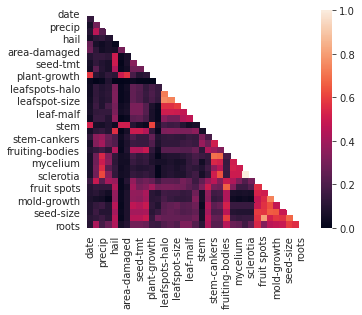

In [13]:
# функция
def cramers_V(var1,var2):
    crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

# подсчет матрицы
rows=[]
tmp = data.drop(['name'], axis=1)

for var1 in tmp:
    col = []
    for var2 in tmp:
        cramers =cramers_V(tmp[var1], tmp[var2]) # Cramer's V test
        col.append(round(cramers, 2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=tmp.columns, index=tmp.columns)


# отрисовка
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [ ]:
# да, скоррелированные переменные есть, например, fruit spots и seed-size, date и plant-growth

In [14]:
# дропаем наблюдение класса 2-4-d-injury, потому что

'''The least populated class in y has only 1 member, which is too few.
The minimum number of groups for any class cannot be less than 2.
'''

data = data.drop(302)

In [15]:
### Задание 2. Делим датасет на train и test.
# Данные должны быть представлены равномерно и стратифицированно

X = data.drop(['name'], axis=1)
y = data['name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y, shuffle=True)

In [16]:
### Задание 3. Обучить RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=5)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
### Задание 4. Удалить из тестовой выборки информацию о принадлежности к классу
# сделано до этого!

In [17]:
### Задание 5. Гадалка-предсказалка
predictions = clf.predict(X_test)

'\nДиагоналные элементы матрицы яно выражены, однако не все\nзначения классификатор определяет верно.\n'

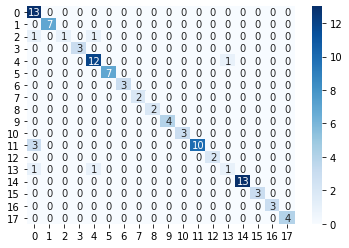

In [18]:
### Задание 6. Гадалка-оценялка (F-мера и матрица неточностей)
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues")

'''
Диагоналные элементы матрицы яно выражены, однако не все
значения классификатор определяет верно.
'''

In [19]:
# смотрим на Precision, Recall, F1-score
print(metrics.classification_report(y_test, predictions))

'''
Значения для bacterial-blight имеют неплохую точность, но плохую чувствительнось.
Для alternarialeaf-spot, brown-spot, frog-eye-leaf-spot картина тоже не идеальна.
'''

                             precision    recall  f1-score   support

        alternarialeaf-spot       0.72      1.00      0.84        13
                anthracnose       1.00      1.00      1.00         7
           bacterial-blight       1.00      0.33      0.50         3
          bacterial-pustule       1.00      1.00      1.00         3
                 brown-spot       0.86      0.92      0.89        13
             brown-stem-rot       1.00      1.00      1.00         7
               charcoal-rot       1.00      1.00      1.00         3
              cyst-nematode       1.00      1.00      1.00         2
diaporthe-pod-&-stem-blight       1.00      1.00      1.00         2
      diaporthe-stem-canker       1.00      1.00      1.00         4
               downy-mildew       1.00      1.00      1.00         3
         frog-eye-leaf-spot       1.00      0.77      0.87        13
           herbicide-injury       1.00      1.00      1.00         2
     phyllosticta-leaf-spot      

'\nЗначения для bacterial-blight имеют неплохую точность, но плохую чувствительнось.\nДля alternarialeaf-spot, brown-spot, frog-eye-leaf-spot картина тоже не идеальна.\n'

'\nЛогично, что в разные отрезки года несчатные бобы будут атаковать раные болезни,\nпотому что у всех патогенов в разное время реализуется жизненный цикл.\nРазные разновидности поражений участков растения также важны для классификации.\nВсе сходится!\n'

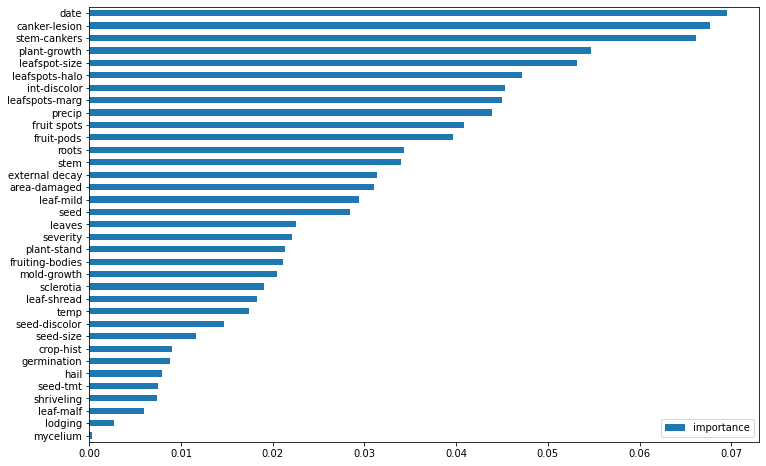

In [20]:
### Задание 7. Топ-3 признаков
imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

'''
Логично, что в разные отрезки года несчатные бобы будут атаковать раные болезни,
потому что у всех патогенов в разное время реализуется жизненный цикл.
Разные разновидности поражений участков растения также важны для классификации.
Все сходится!
'''

In [ ]:
### Задане 8. Оптимизация с помощью GridSearch
parameters={'n_estimators':range(100,150), 'max_depth':range(1,10),
            'min_samples_split': range(2,5), 'min_samples_leaf': range(1,5)}
search = GridSearchCV(clf, parameters)
search.fit(X_train, y_train)

# ноут считает уже сто лет... :(

In [ ]:
best_tree = search.best_estimator_
predictions = best_tree.predict(X_test)

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Blues")

In [ ]:
print(metrics.classification_report(y_test, predictions))

In [ ]:
imp = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))